# Lab 3: Bayes Classifier and Boosting

## Jupyter notebooks

In this lab, you can use Jupyter <https://jupyter.org/> to get a nice layout of your code and plots in one document. However, you may also use Python as usual, without Jupyter.

If you have Python and pip, you can install Jupyter with `sudo pip install jupyter`. Otherwise you can follow the instruction on <http://jupyter.readthedocs.org/en/latest/install.html>.

And that is everything you need! Now use a terminal to go into the folder with the provided lab files. Then run `jupyter notebook` to start a session in that folder. Click `lab3.ipynb` in the browser window that appeared to start this very notebook. You should click on the cells in order and either press `ctrl+enter` or `run cell` in the toolbar above to evaluate all the expressions.

Be sure to put `%matplotlib inline` at the top of every code cell where you call plotting functions to get the resulting plots inside the document.

## Import the libraries

In Jupyter, select the cell below and press `ctrl + enter` to import the needed libraries.
Check out `labfuns.py` if you are interested in the details.

In [4]:
import numpy as np
from scipy import misc
from imp import reload
from labfuns import *
import random
from numpy.linalg import det, inv

## Bayes classifier functions to implement

The lab descriptions state what each function should do.

In [6]:
# NOTE: you do not need to handle the W argument for this part!
# in: labels - N vector of class labels
# out: prior - C x 1 vector of class priors
def computePrior(labels, W=None):
    Npts = labels.shape[0]
    if W is None:
        W = np.ones((Npts,1))/Npts
    else:
        assert(W.shape[0] == Npts)
    classes = np.unique(labels)
    Nclasses = np.size(classes)

    prior = np.zeros((Nclasses,1))

    # TODO: compute the values of prior for each class!
    for k,label in enumerate(classes):
        idx = np.where(labels==label)[0]
        wlc = W[idx]
        
        # Nk = idx.shape[0]
        # Calculate mu by summing across each data point and divide by number of data points
        # prior[k] = Nk / labels.shape[0]
        prior[k] = np.sum(wlc)/np.sum(W)

    return prior

# NOTE: you do not need to handle the W argument for this part!
# in:      X - N x d matrix of N data points
#     labels - N vector of class labels
# out:    mu - C x d matrix of class means (mu[i] - class i mean)
#      sigma - C x d x d matrix of class covariances (sigma[i] - class i sigma)
def mlParams(X, labels, W=None):
    assert(X.shape[0]==labels.shape[0])
    Npts,Ndims = np.shape(X)
    classes = np.unique(labels)
    Nclasses = np.size(classes)

    if W is None:
        W = np.ones((Npts,1))/float(Npts)

    mu = np.zeros((Nclasses,Ndims))
    sigma = np.zeros((Nclasses,Ndims,Ndims))

    # TODO: fill in the code to compute mu and sigma!
    for jdx,label in enumerate(classes):
        idx = np.where(labels==label)[0]
        xlc = X[idx,:]
        wlc = W[idx].reshape((-1,1))
        # determine number of data points in each class
        size = xlc.shape[0]
        # Calculate mu by summing across each data point and divide by number of data points
        muk = np.sum(xlc*wlc, axis=0)/np.sum(wlc)
        # muk = np.sum(xlc, axis=0)/size
        mu[jdx] = muk


        # Calculate the variance for each attribute across all data points
        variance = np.sum(wlc*np.multiply((xlc-muk), xlc-muk),axis=0)/np.sum(wlc)
        # print(variance.shape)
        # variance = np.diag(variance)
        # Add covariance matrix for class k to sigma
        sigma[jdx] = np.diag(variance)


    return mu, sigma

# in:      X - N x d matrix of M data points
#      prior - C x 1 matrix of class priors
#         mu - C x d matrix of class means (mu[i] - class i mean)
#      sigma - C x d x d matrix of class covariances (sigma[i] - class i sigma)
# out:     h - N vector of class predictions for test points
def classifyBayes(X, prior, mu, sigma):

    Npts = X.shape[0]
    Nclasses,Ndims = np.shape(mu)
    logProb = np.zeros((Nclasses, Npts))

    # TODO: fill in the code to compute the log posterior logProb!
    for jdx, xStar in enumerate(X):
        for k in range(Nclasses):
            standardDev = xStar - mu[k]
            logProb[k,jdx] = -np.log(det(sigma[k]))/2 - \
                    np.dot(np.dot((xStar-mu[k]),inv(sigma[k])),(xStar-mu[k]).transpose())/2 + \
                    np.log(prior[k][0])
    
    # one possible way of finding max a-posteriori once
    # you have computed the log posterior
    h = np.argmax(logProb,axis=0)
    return h

The implemented functions can now be summarized into the `BayesClassifier` class, which we will use later to test the classifier, no need to add anything else here:

In [7]:
# NOTE: no need to touch this
class BayesClassifier(object):
    def __init__(self):
        self.trained = False

    def trainClassifier(self, X, labels, W=None):
        rtn = BayesClassifier()
        rtn.prior = computePrior(labels, W)
        rtn.mu, rtn.sigma = mlParams(X, labels, W)
        rtn.trained = True
        return rtn

    def classify(self, X):
        return classifyBayes(X, self.prior, self.mu, self.sigma)

## Test the Maximum Likelihood estimates

Call `genBlobs` and `plotGaussian` to verify your estimates.

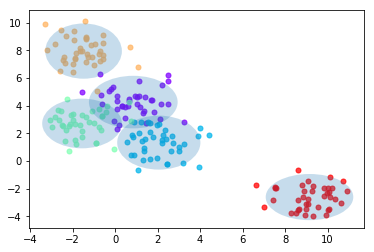

In [4]:
%matplotlib inline

X, labels = genBlobs(centers=5)
mu, sigma = mlParams(X,labels)
plotGaussian(X,labels,mu,sigma)

Call the `testClassifier` and `plotBoundary` functions for this part.

In [5]:
testClassifier(BayesClassifier(), dataset='iris', split=0.7)

Trial: 0 Accuracy 84.4
Trial: 10 Accuracy 95.6
Trial: 20 Accuracy 93.3
Trial: 30 Accuracy 86.7
Trial: 40 Accuracy 88.9
Trial: 50 Accuracy 91.1
Trial: 60 Accuracy 86.7
Trial: 70 Accuracy 91.1
Trial: 80 Accuracy 86.7
Trial: 90 Accuracy 91.1
Final mean classification accuracy  89 with standard deviation 4.16


In [6]:
testClassifier(BayesClassifier(), dataset='vowel', split=0.7)

Trial: 0 Accuracy 61
Trial: 10 Accuracy 66.2
Trial: 20 Accuracy 74
Trial: 30 Accuracy 66.9
Trial: 40 Accuracy 59.7
Trial: 50 Accuracy 64.3
Trial: 60 Accuracy 66.9
Trial: 70 Accuracy 63.6
Trial: 80 Accuracy 62.3
Trial: 90 Accuracy 70.8
Final mean classification accuracy  64.7 with standard deviation 4.03


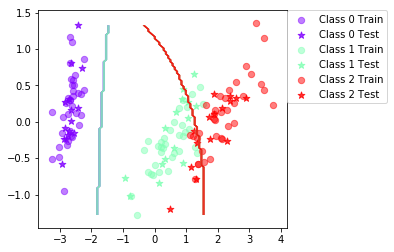

In [7]:
%matplotlib inline
plotBoundary(BayesClassifier(), dataset='iris',split=0.7)

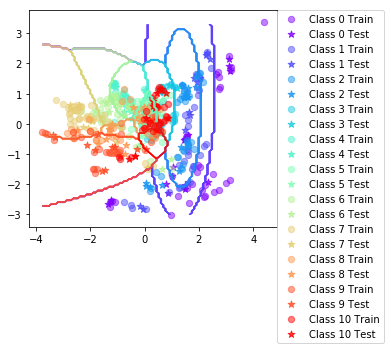

In [8]:
%matplotlib inline
plotBoundary(BayesClassifier(), dataset='vowel',split=0.7)

## (1) When can a feature independence assumption be reasonable and when not?

Naive Bayes classifiers are often surprisingly successful in many applications. Essentially, the assumption states that the features are conditionally independent given the class. Often the indepedence assumptions are completely inaccurate; however, it can still be effective even when there are dependencies between the features. It can often be advantageous to use naive bayes when there is a moderate or large training set available. It can be especially effective when there are a lot of features, for example. This way, one only need look at one dimension instead of all of the dimensions fo the feature space simultaneously. It is often reasonable to use naive bayes if you have an idea of the underlying distribution of your continuous features. There is also evidence that the zero-one loss of the naive is effective; naive bayes is typically much worse for regression applications rather than classification. A couple additional scenarios in which naive bayes can be effective is if feature dependencies are distributed evenly between each class or if dependencies cancel each other out.

http://www.aaai.org/Papers/FLAIRS/2004/Flairs04-097.pdf

## (2) How does the decision boundary look for the Iris dataset? How could one improve the classification results for this scenario by changing classifier or, alternatively, manipulating the data?

The decision boundary does not look particularly good, especially when differentiating between the green and red points. One could change the classifier by weighting misclassified points higher. Alternatively, the data could be projected into a different space in order to have a clearer decision boundary. 

## Boosting functions to implement

The lab descriptions state what each function should do.

## Assignment 4

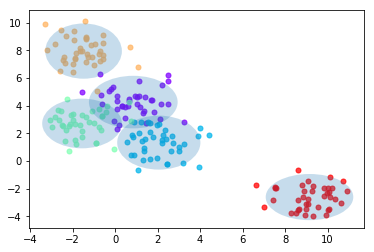

array([1, 3, 0, 3, 1, 0, 2, 0, 0, 1, 0, 1, 4, 2, 0, 1, 2, 3, 3, 1, 3, 2, 0,
       3, 4, 1, 3, 0, 4, 3, 1, 2, 2, 0, 2, 0, 4, 3, 1, 0, 2, 0, 0, 1, 4, 4,
       4, 1, 1, 3, 0, 1, 3, 1, 4, 4, 2, 3, 4, 1, 4, 4, 2, 0, 2, 4, 2, 1, 1,
       4, 4, 1, 4, 0, 3, 4, 0, 2, 2, 0, 3, 0, 1, 1, 3, 3, 0, 0, 4, 4, 3, 4,
       3, 3, 0, 0, 1, 2, 4, 0, 0, 2, 4, 1, 1, 4, 4, 3, 0, 2, 1, 0, 4, 3, 2,
       1, 2, 2, 2, 2, 4, 0, 4, 0, 0, 2, 0, 3, 1, 2, 2, 0, 3, 1, 3, 4, 0, 2,
       4, 4, 1, 4, 2, 2, 3, 1, 1, 3, 1, 0, 2, 3, 4, 4, 4, 2, 3, 2, 1, 4, 3,
       3, 2, 3, 1, 2, 3, 3, 4, 0, 0, 2, 1, 1, 0, 3, 4, 3, 3, 1, 1, 2, 0, 2,
       2, 0, 2, 0, 3, 3, 4, 0, 1, 1, 1, 1, 4, 4, 2, 3])

In [9]:
%matplotlib inline

X, labels = genBlobs(centers=5)
Npts = np.shape(X)[0]
W = np.ones((Npts,1))/float(Npts)
mu, sigma = mlParams(X,labels, W)
plotGaussian(X,labels,mu,sigma)
prior = computePrior(labels)
classifyBayes(X,prior,mu,sigma)

In [10]:
testClassifier(BayesClassifier(), dataset='iris', split=0.7)

Trial: 0 Accuracy 84.4
Trial: 10 Accuracy 95.6
Trial: 20 Accuracy 93.3
Trial: 30 Accuracy 86.7
Trial: 40 Accuracy 88.9
Trial: 50 Accuracy 91.1
Trial: 60 Accuracy 86.7
Trial: 70 Accuracy 91.1
Trial: 80 Accuracy 86.7
Trial: 90 Accuracy 91.1
Final mean classification accuracy  89 with standard deviation 4.16


In [32]:
# in: base_classifier - a classifier of the type that we will boost, e.g. BayesClassifier
#                   X - N x d matrix of N data points
#              labels - N vector of class labels
#                   T - number of boosting iterations
# out:    classifiers - (maximum) length T Python list of trained classifiers
#              alphas - (maximum) length T Python list of vote weights
def delta(guesses,labels):
    assert len(labels) == len(guesses)
    return np.array([1 if labels[i] == guesses[i] else 0 for i in range(len(guesses))])

def trainBoost(base_classifier, X, labels, T=10):
    # these will come in handy later on
    Npts,Ndims = np.shape(X)

    classifiers = [] # append new classifiers to this list
    alphas = [] # append the vote weight of the classifiers to this list

    # The weights for the first iteration
    wCur = np.ones((Npts,1))/float(Npts)

    for i_iter in range(0, T):
        # a new classifier can be trained like this, given the current weights
        classifiers.append(base_classifier.trainClassifier(X, labels, wCur))

        # do classification for each point
        vote = classifiers[-1].classify(X)
        
        epsilon = np.dot(wCur.reshape(-1),np.ones(vote.size)-delta(vote,labels))
        epsilon += .000000001
        #epsilon = np.sum(wCur*(np.ones(vote.size)-delta(vote,labels)))
        alpha = 1/2*(np.log(1-epsilon) - np.log(epsilon))
        
        temp = np.array([np.exp(-alpha) if vote[i] == labels[i] else np.exp(alpha) for i in range(len(vote))])
        temp = temp.reshape((-1,1))
        wCur *= temp
        wCur = wCur / np.sum(wCur)

        # TODO: Fill in the rest, construct the alphas etc.
        # ==========================
        
        alphas.append(alpha) # you will need to append the new alpha
        # ==========================
        
    return classifiers, alphas

# in:       X - N x d matrix of N data points
# classifiers - (maximum) length T Python list of trained classifiers as above
#      alphas - (maximum) length T Python list of vote weights
#    Nclasses - the number of different classes
# out:  yPred - N vector of class predictions for test points
def classifyBoost(X, classifiers, alphas, Nclasses):
    Npts = X.shape[0]
    Ncomps = len(classifiers)
    
    # if we only have one classifier, we may just classify directly
    if Ncomps == 1:
        return classifiers[0].classify(X)
    else:
        votes = np.zeros((Npts,Nclasses))
        #c = np.array(range(Nclasses))
        h = np.zeros((len(classifiers),Npts))
        for t in range(len(classifiers)):
            h[t] = classifiers[t].classify(X)
            
            for c in range(Nclasses):
                idx = np.where(h[t]==c)[0]
                votes[idx,c] += alphas[t]
        '''
        for i,x in enumerate(X):
            for k in range(Nclasses):
                deltas = np.array([alphas[t] if h[t][i]==k else 0 for t in range(len(classifiers))])
                votes[i][k] = np.sum(deltas)

                    
            
            idx = np.where(h[t]==c)[0]
            temp = np.zeros(len(X))
            temp[idx] = alphas[t]
            '''
        # TODO: implement classificiation when we have trained several classifiers!
        # here we can do it by filling in the votes vector with weighted votes
        # ==========================
        
        # ==========================

        # one way to compute yPred after accumulating the votes
        return np.argmax(votes,axis=1)

The implemented functions can now be summarized another classifer, the `BoostClassifier` class. This class enables boosting different types of classifiers by initializing it with the `base_classifier` argument. No need to add anything here.

In [9]:
# NOTE: no need to touch this
class BoostClassifier(object):
    def __init__(self, base_classifier, T=10):
        self.base_classifier = base_classifier
        self.T = T
        self.trained = False

    def trainClassifier(self, X, labels):
        rtn = BoostClassifier(self.base_classifier, self.T)
        rtn.nbr_classes = np.size(np.unique(labels))
        rtn.classifiers, rtn.alphas = trainBoost(self.base_classifier, X, labels, self.T)
        rtn.trained = True
        return rtn

    def classify(self, X):
        return classifyBoost(X, self.classifiers, self.alphas, self.nbr_classes)

## Run some experiments

Call the `testClassifier` and `plotBoundary` functions for this part.

In [33]:
testClassifier(BoostClassifier(BayesClassifier(), T=10), dataset='iris',split=0.7)

Trial: 0 Accuracy 95.6
Trial: 10 Accuracy 100
Trial: 20 Accuracy 93.3
Trial: 30 Accuracy 91.1
Trial: 40 Accuracy 97.8
Trial: 50 Accuracy 93.3
Trial: 60 Accuracy 93.3
Trial: 70 Accuracy 97.8
Trial: 80 Accuracy 95.6
Trial: 90 Accuracy 93.3
Final mean classification accuracy  94.7 with standard deviation 2.82


In [34]:
testClassifier(BoostClassifier(BayesClassifier(), T=10), dataset='vowel',split=0.7)

Trial: 0 Accuracy 76.6
Trial: 10 Accuracy 86.4
Trial: 20 Accuracy 83.1
Trial: 30 Accuracy 80.5
Trial: 40 Accuracy 72.7
Trial: 50 Accuracy 76
Trial: 60 Accuracy 81.8
Trial: 70 Accuracy 82.5
Trial: 80 Accuracy 79.9
Trial: 90 Accuracy 83.1
Final mean classification accuracy  80.2 with standard deviation 3.52


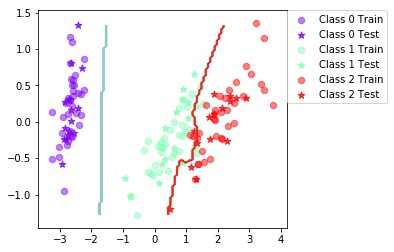

In [35]:
%matplotlib inline
plotBoundary(BoostClassifier(BayesClassifier()), dataset='iris',split=0.7)

Now repeat the steps with a decision tree classifier.

In [36]:
testClassifier(DecisionTreeClassifier(), dataset='iris', split=0.7)

Trial: 0 Accuracy 95.6
Trial: 10 Accuracy 100
Trial: 20 Accuracy 91.1
Trial: 30 Accuracy 91.1
Trial: 40 Accuracy 93.3
Trial: 50 Accuracy 91.1
Trial: 60 Accuracy 88.9
Trial: 70 Accuracy 88.9
Trial: 80 Accuracy 93.3
Trial: 90 Accuracy 88.9
Final mean classification accuracy  92.4 with standard deviation 3.71


In [37]:
testClassifier(BoostClassifier(DecisionTreeClassifier(), T=10), dataset='iris',split=0.7)

Trial: 0 Accuracy 95.6
Trial: 10 Accuracy 100
Trial: 20 Accuracy 95.6
Trial: 30 Accuracy 93.3
Trial: 40 Accuracy 93.3
Trial: 50 Accuracy 95.6
Trial: 60 Accuracy 88.9
Trial: 70 Accuracy 93.3
Trial: 80 Accuracy 93.3
Trial: 90 Accuracy 93.3
Final mean classification accuracy  94.6 with standard deviation 3.65


In [38]:
testClassifier(DecisionTreeClassifier(), dataset='vowel',split=0.7)

Trial: 0 Accuracy 63.6
Trial: 10 Accuracy 68.8
Trial: 20 Accuracy 63.6
Trial: 30 Accuracy 66.9
Trial: 40 Accuracy 59.7
Trial: 50 Accuracy 63
Trial: 60 Accuracy 59.7
Trial: 70 Accuracy 68.8
Trial: 80 Accuracy 59.7
Trial: 90 Accuracy 68.2
Final mean classification accuracy  64.1 with standard deviation 4


In [39]:
testClassifier(BoostClassifier(DecisionTreeClassifier(), T=10), dataset='vowel',split=0.7)

Trial: 0 Accuracy 85.7
Trial: 10 Accuracy 89.6
Trial: 20 Accuracy 88.3
Trial: 30 Accuracy 91.6
Trial: 40 Accuracy 83.8
Trial: 50 Accuracy 80.5
Trial: 60 Accuracy 89
Trial: 70 Accuracy 86.4
Trial: 80 Accuracy 85.7
Trial: 90 Accuracy 85.7
Final mean classification accuracy  86.8 with standard deviation 2.83


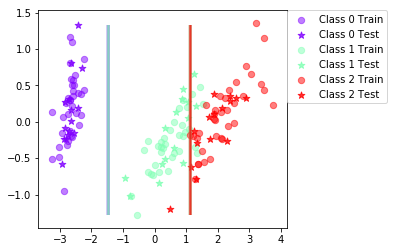

In [40]:
%matplotlib inline
plotBoundary(DecisionTreeClassifier(), dataset='iris',split=0.7)

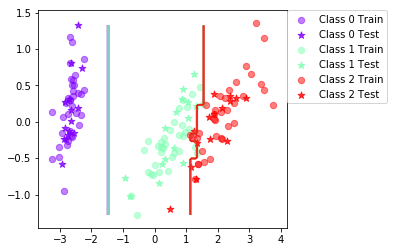

In [41]:
%matplotlib inline
plotBoundary(BoostClassifier(DecisionTreeClassifier(), T=10), dataset='iris',split=0.7)

# Assignment 5

(1) Is there any improvement in classification accuracy? Why/why not?
    
    Unboosted, the naive bayes classifier gave accuracies of 89 and 64.7 for the iris and vowel datasets, respectively. Boosted, the accuracies were 94.7 and 80.2. The classification accuracy improved in both cases, and this is especially noticeable for the vowel dataset. Naive bayes is a relatively stable classifier with high bias and low variance. This is because the feature independence assumption gives high bias to naive bayes classifiers. Boosting methods are particularly effective for weak classifiers with high bias. This why there is such an improvement for the vowel dataset; the trained classifiers were relatively weak and there was large room for improvement. The iris dataset classifier, however, was already pretty strong despite the fact that we were only using naive bayes. Boosting, therefore, could not help improve performance by that much. 

(2) Plot the decision boundary of the boosted classifier on iris and compare it with that of the basic. What differences do you notice? Is the boundary of the boosted
version more complex?
    
    The boosted decision boundary is more complex and does a much better job of capturing the boundary between the classes. The nonboosted classifier seemed to completely miss the boundary between the red and green classes towards the top.
    
(3) Can we make up for not using a more advanced model in the basic classifier
(e.g. independent features) by using boosting?

    Sometimes boosting can help make up for not using a more advanced model. Particularly if the weaker classifier has high bias and is a relatively weak classifier (accuracy just over 50%), boosting can help achieve results that would typically be seen with a more advanced model. 
   

# Assignment 6

(1) Is there any improvement in classification accuracy? Why/why not? 

    There is a significant improvement for the vowel dataset and a slight improvement for the iris dataset. Visually, the iris dataset seems fairly easy to classify. The clssifier is therefore already pretty strong and is not particularly biases relative to the underlying structure of the data. The vowel classifier, however, is much weaker and is biased relative to the structure of the data. Boosting provides a lot of improvement in this scenario. 
  
(2) Plot the decision boundary of the boosted classifier on iris and compare it with that of the basic. What differences do you notice? Is the boundary of the boosted version more complex?
    
    There isn't a huge difference between the decision boundaries, but the boosted version is slightly more complex. 
    
(3) Can we make up for not using a more advanced model in the basic classifier (e.g. independent features) by using boosting?

    Yes, boosting can be very effective for decision trees. Boosted decision trees are considered some of the best "off the shelf classifiers". It is especially popular to use them with very simple trees, even stumps, to gain high accuracy.

# Assignment 7

If you had to pick a classifier, naive Bayes or a decision tree or the boosted versions of these, which one would you pick? Motivate from the following criteria:
    
    • Outliers
    • Irrelevant inputs: part of the feature space is irrelevant
    • Predictive power
    • Mixed types of data: binary, categorical or continuous features, etc.
    • Scalability: the dimension of the data, D, is large or the number of instances,
      N, is large, or both.

Boosting can be sensitive to noisy data and outliers, however I would imagine that it would be less sensitive than a single decision tree. Naive bayes is relatively immune to overfitting because it is so high bias. Trees are good at ignoring irrelevant features because they would not result in a large amount of information gain. However, naive bayes are also effective in that they can ignore interactions between features, though they do not ignore some features completely. Boosted decision trees can have very powerful predictive power; however, they suffer from a lack of interpretability compared to normal decision trees. Naive bayes are typically very good for moderate or large training sets. Trees are very good at handling mixed data types. If the classifier is unboosted, I would consider picking naive bayes whereas for boosted I would pick a boosted decision tree. 



## Bonus: Visualize faces classified using boosted decision trees

Note that this part of the assignment is completely voluntary! First, let's check how a boosted decision tree classifier performs on the olivetti data. Note that we need to reduce the dimension a bit using PCA, as the original dimension of the image vectors is `64 x 64 = 4096` elements.

In [9]:
testClassifier(BayesClassifier(), dataset='olivetti',split=0.7, dim=20)

Trial: 0 Accuracy 88.3
Trial: 10 Accuracy 90.8
Trial: 20 Accuracy 85
Trial: 30 Accuracy 89.2
Trial: 40 Accuracy 89.2
Trial: 50 Accuracy 84.2
Trial: 60 Accuracy 91.7
Trial: 70 Accuracy 82.5
Trial: 80 Accuracy 81.7
Trial: 90 Accuracy 86.7
Final mean classification accuracy  87.7 with standard deviation 3.03


In [10]:
testClassifier(DecisionTreeClassifier(), dataset='olivetti',split=0.7, dim=20)

Trial: 0 Accuracy 65.8
Trial: 10 Accuracy 57.5
Trial: 20 Accuracy 49.2
Trial: 30 Accuracy 50
Trial: 40 Accuracy 53.3
Trial: 50 Accuracy 44.2
Trial: 60 Accuracy 49.2
Trial: 70 Accuracy 54.2
Trial: 80 Accuracy 50
Trial: 90 Accuracy 52.5
Final mean classification accuracy  48.4 with standard deviation 6.45


In [42]:
testClassifier(BoostClassifier(DecisionTreeClassifier(), T=10), dataset='olivetti',split=0.7, dim=20)

Trial: 0 Accuracy 71.7
Trial: 10 Accuracy 70
Trial: 20 Accuracy 73.3
Trial: 30 Accuracy 68.3
Trial: 40 Accuracy 72.5
Trial: 50 Accuracy 66.7
Trial: 60 Accuracy 70
Trial: 70 Accuracy 75
Trial: 80 Accuracy 72.5
Trial: 90 Accuracy 74.2
Final mean classification accuracy  70.2 with standard deviation 6.22


You should get an accuracy around 70%. If you wish, you can compare this with using pure decision trees or a boosted bayes classifier. Not too bad, now let's try and classify a face as belonging to one of 40 persons!

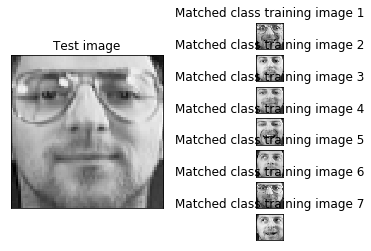

In [12]:
%matplotlib inline
X,y,pcadim = fetchDataset('olivetti') # fetch the olivetti data
xTr,yTr,xTe,yTe,trIdx,teIdx = trteSplitEven(X,y,0.7) # split into training and testing
pca = decomposition.PCA(n_components=20) # use PCA to reduce the dimension to 20
pca.fit(xTr) # use training data to fit the transform
xTrpca = pca.transform(xTr) # apply on training data
xTepca = pca.transform(xTe) # apply on test data
# use our pre-defined decision tree classifier together with the implemented
# boosting to classify data points in the training data
classifier = BoostClassifier(DecisionTreeClassifier(), T=10).trainClassifier(xTrpca, yTr)
yPr = classifier.classify(xTepca)
# choose a test point to visualize
testind = random.randint(0, xTe.shape[0]-1)
# visualize the test point together with the training points used to train
# the class that the test point was classified to belong to
visualizeOlivettiVectors(xTr[yTr == yPr[testind],:], xTe[testind,:])